In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.data

In [ ]:
iris.feature_names

In [ ]:
iris.target

In [ ]:
iris.target_names

In [9]:
df = pd.DataFrame(iris.data , columns=iris.feature_names) #column gives error --> it's columns

In [ ]:
df.tail()

In [19]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [ ]:
#CAn change the value of target column also.. b ydeafualt it sets 0
df[df.target==1].head()

In [18]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])                #apply() to execute expression.
df.head()                                         #You use an apply function with lambda along the row with axis=1. 
                                                  #The general syntax is:
                                                  #df.apply(lambda x: func(x['col1'],x['col2']),axis=1)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [20]:
df[45:55]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_name  
45       0      setosa  
46       0      setosa  
47       0      setosa  
48       0      setosa  
49       0      setosa  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [21]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

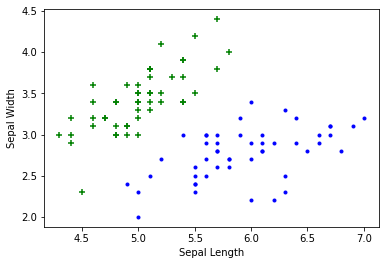

In [23]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

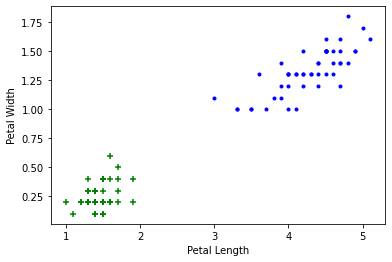

In [24]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

### Training SVM

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['target','flower_name'], axis='columns')     #drop() method removes the specified row or column.
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train)

120

In [27]:
len(X_test)

30

In [28]:
from sklearn.svm import SVC
model = SVC()

In [29]:
model.fit(X_train, y_train)

SVC()

In [30]:
model.score(X_test, y_test)

0.9333333333333333

In [31]:
model.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

### Tune parameters

1. Regularization (C)

In [32]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [33]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

2. Gamma

In [34]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

3. Kernel

In [37]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667